# Gaussian Mixture Model

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import mode

## Data Preparation

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

### PCA

In [3]:
pca = PCA(n_components=30,random_state=42)
X_pca = pca.fit_transform(X)

## Model Development

In [4]:
n_components = 10
gmm = GaussianMixture(n_components=n_components,covariance_type='full',random_state=42)
gmm.fit(X_pca)

GaussianMixture(n_components=10, random_state=42)

In [5]:
y_gmm = gmm.predict(X_pca)

## Mapping and evaluation

In [6]:
def map_clusters_to_labels(y_true,y_pred):
    labels = np.zeros_like(y_pred)
    for i in range(n_components):
        mask = (y_pred == i)
        if np.any(mask):
            labels[mask] = mode(y_true[mask],keepdims=False).mode
    return labels

In [7]:
y_pred_mapped = map_clusters_to_labels(y,y_gmm)

In [10]:
acc = accuracy_score(y,y_pred_mapped)
print(f"Accuracy : {acc:.2f}")

Accuracy : 0.82


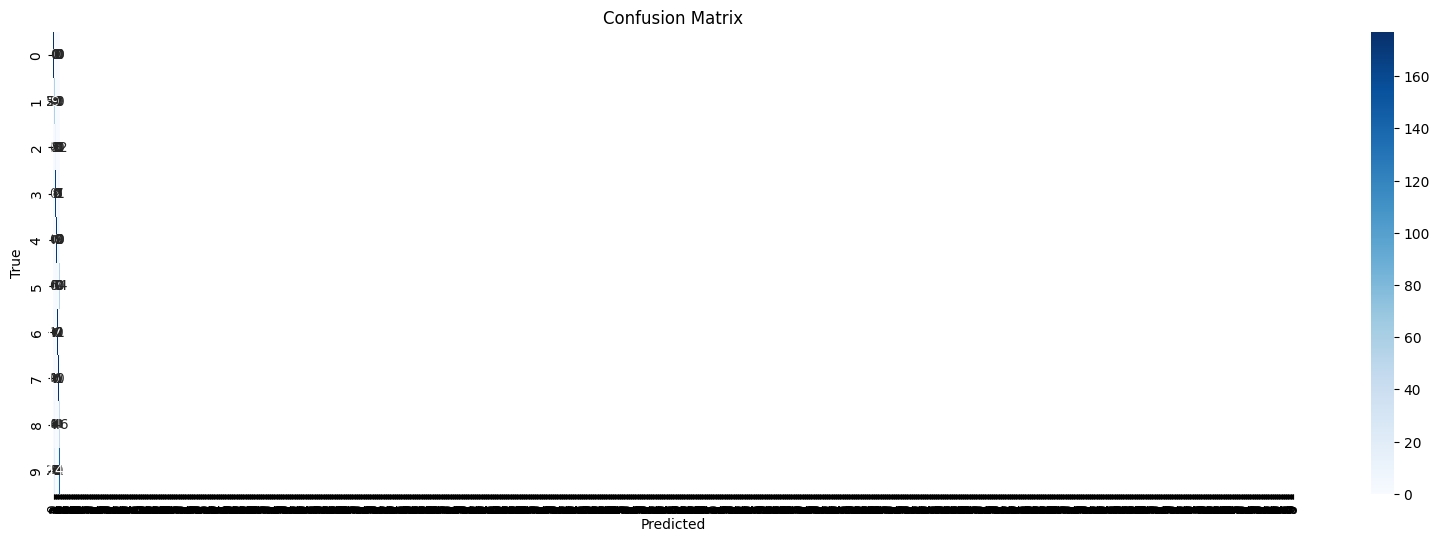

In [12]:
cm = confusion_matrix(y,y_pred_mapped)
plt.figure(figsize=(20,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=digits.target,yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


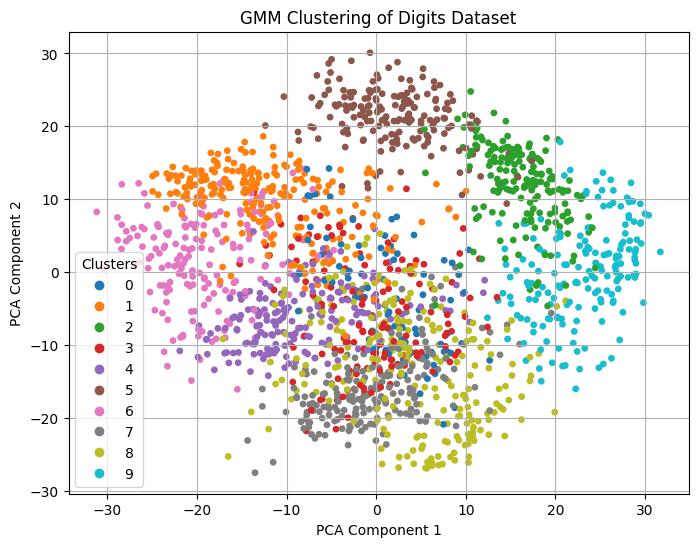

In [13]:
X_2d = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_2d[:,0],X_2d[:,1],c=y_gmm,cmap='tab10',s=15)
plt.legend(*scatter.legend_elements(),title="Clusters")
plt.title("GMM Clustering of Digits Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


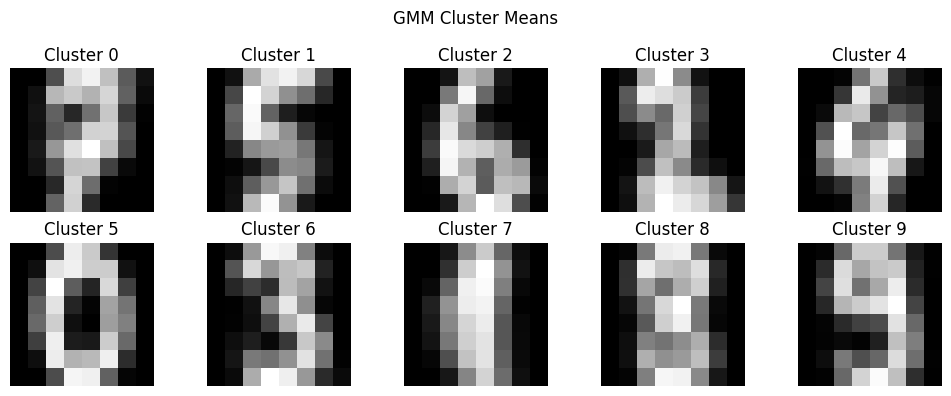

In [16]:
gmm.fit(X)
y_gmm = gmm.predict(X)

plt.figure(figsize=(10,4))
for i,mean in enumerate(gmm.means_):
    plt.subplot(2,5,i+1)
    plt.imshow(mean.reshape(8,8),cmap='gray')
    plt.title(f"Cluster {i}")
    plt.axis('off')

plt.suptitle("GMM Cluster Means")
plt.tight_layout()
plt.show()